In [1]:
!pip install scikit-learn
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import os 

In [20]:
# Path to your models
model_paths_raf_db = ["best_model_vgg_raf-db_1.pth", "best_model_resnet34_raf-db_1.pth", "best_model_resnet18_raf-db_1.pth", "best_mode_RAF-DB.pth"]
model_paths_fer2013 = ["best_model_vgg_fer2013_1.pth", "best_model_resnet34_fer2013_1.pth", "best_model_resnet18_fer2013_1.pth", "best_model.pth"]

# Transform the dataset
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
def load_data(base_dir, batch_size=16, transform=None):
    """
    Function to load train and test datasets and return their DataLoaders.

    Args:
        base_dir (str): Base directory containing train/test subdirectories.
        batch_size (int): Batch size for the DataLoader.
        transform (callable, optional): Transformations to apply to the images.

    Returns:
        tuple: Train DataLoader, Validation DataLoader
    """
    # Define train and test directories
    train_dir = os.path.join(base_dir, "train")
    val_dir = os.path.join(base_dir, "test")
    
    # Use torchvision.datasets.ImageFolder to automatically handle class folders
    test_dataset = datasets.ImageFolder(root=val_dir, transform=transform)
    
    label_names = test_dataset.classes
    # DataLoaders
    dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
    return dataloader, label_names


In [15]:

# Updated evaluate_model function
def evaluate_model(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            # Move images and labels to the same device as the model
            images = images.to(device)
            labels = labels.to(device)
            
            # Forward pass
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            
            # Store predictions and true labels
            all_preds.extend(preds.cpu().numpy())  # Move to CPU for storing
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_preds), np.array(all_labels)
# Plot confusion matrix

def plot_confusion_matrix_normalized(y_true, y_pred, model_name, data_classes):
    # Create confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix (Counts):\n", conf_matrix)
    
    # Normalize confusion matrix by row (true classes) to get percentages
    conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1, keepdims=True)
    print("Confusion Matrix (Percentages):\n", conf_matrix_normalized)
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized, display_labels=data_classes)
    disp.plot(cmap=plt.cm.Blues, values_format=".2f")  # Display percentages with 2 decimal places
    plt.title("Confusion Matrix (Percentages)")
    plt.show()
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Normalize the confusion matrix to values between 0 and 1
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_normalized = np.nan_to_num(cm_normalized)  # Handle division by zero if present
    
    # Display the confusion matrix as normalized values
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=data_classes)
    disp.plot(cmap="viridis", values_format=".2f")  # Format to show normalized values with two decimals
    plt.title(f"Confusion Matrix for {model_name} (Normalized to 0-1)")
    plt.show()

Confusion Matrix (Counts):
 [[  90   21    7   13   13    6   12]
 [  11   53    3   19   56    9    9]
 [   1    2   39    6    5    5   16]
 [   4    8   12 1043   72   14   32]
 [   4   13    0   30  554   29   50]
 [   7   19    8   46  112  273   13]
 [   7    0   11   16   27    3  265]]
Confusion Matrix (Percentages):
 [[0.55555556 0.12962963 0.04320988 0.08024691 0.08024691 0.03703704
  0.07407407]
 [0.06875    0.33125    0.01875    0.11875    0.35       0.05625
  0.05625   ]
 [0.01351351 0.02702703 0.52702703 0.08108108 0.06756757 0.06756757
  0.21621622]
 [0.00337553 0.00675105 0.01012658 0.88016878 0.06075949 0.01181435
  0.02700422]
 [0.00588235 0.01911765 0.         0.04411765 0.81470588 0.04264706
  0.07352941]
 [0.01464435 0.03974895 0.0167364  0.09623431 0.23430962 0.57112971
  0.02719665]
 [0.0212766  0.         0.03343465 0.04863222 0.08206687 0.00911854
  0.80547112]]


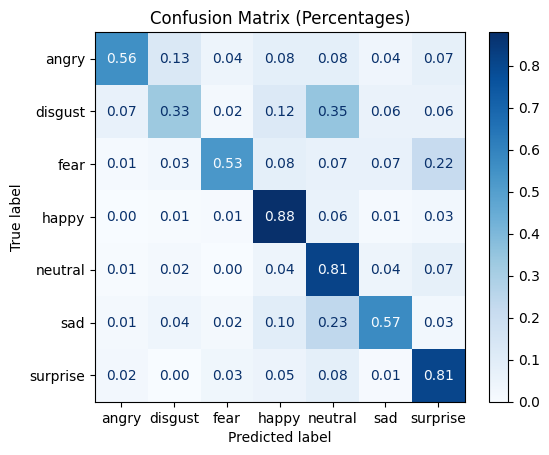

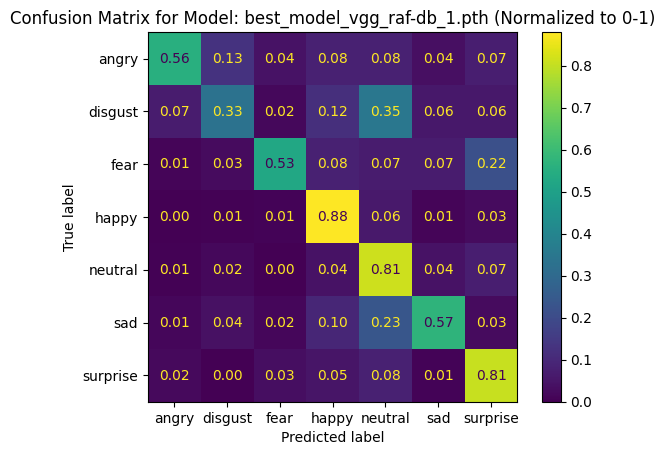

Confusion Matrix (Counts):
 [[  99    7    2   11   14   20    9]
 [  21   39    0   23   47   25    5]
 [   5    2   29   10    4   12   12]
 [  13   15    1 1070   53   25    8]
 [   6   17    0   39  518   83   17]
 [  11   12    1   49   74  319   12]
 [  17    2    5   18   40   12  235]]
Confusion Matrix (Percentages):
 [[6.11111111e-01 4.32098765e-02 1.23456790e-02 6.79012346e-02
  8.64197531e-02 1.23456790e-01 5.55555556e-02]
 [1.31250000e-01 2.43750000e-01 0.00000000e+00 1.43750000e-01
  2.93750000e-01 1.56250000e-01 3.12500000e-02]
 [6.75675676e-02 2.70270270e-02 3.91891892e-01 1.35135135e-01
  5.40540541e-02 1.62162162e-01 1.62162162e-01]
 [1.09704641e-02 1.26582278e-02 8.43881857e-04 9.02953586e-01
  4.47257384e-02 2.10970464e-02 6.75105485e-03]
 [8.82352941e-03 2.50000000e-02 0.00000000e+00 5.73529412e-02
  7.61764706e-01 1.22058824e-01 2.50000000e-02]
 [2.30125523e-02 2.51046025e-02 2.09205021e-03 1.02510460e-01
  1.54811715e-01 6.67364017e-01 2.51046025e-02]
 [5.16717325

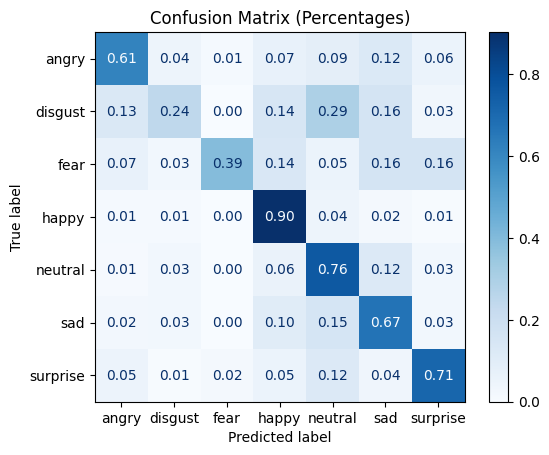

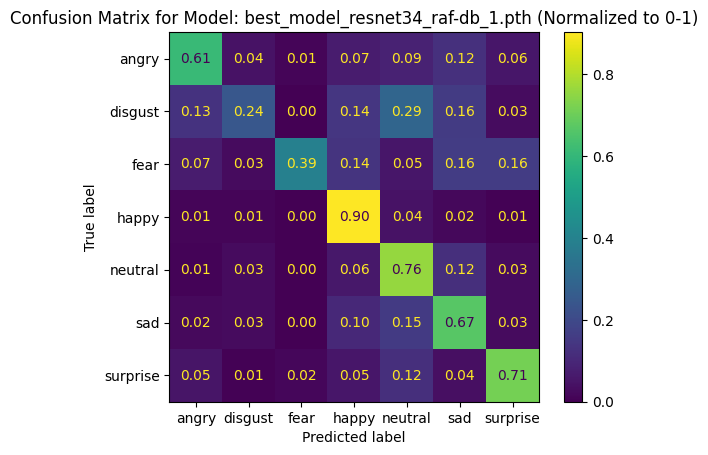

Confusion Matrix (Counts):
 [[  93   14    5   15   13   11   11]
 [  14   58    2   19   47   15    5]
 [   6    2   32    8    4    3   19]
 [   8   14    2 1068   59   21   13]
 [   5   23    2   33  539   56   22]
 [   7   11    5   61   87  293   14]
 [   8    5    5   20   33    6  252]]
Confusion Matrix (Percentages):
 [[0.57407407 0.08641975 0.0308642  0.09259259 0.08024691 0.06790123
  0.06790123]
 [0.0875     0.3625     0.0125     0.11875    0.29375    0.09375
  0.03125   ]
 [0.08108108 0.02702703 0.43243243 0.10810811 0.05405405 0.04054054
  0.25675676]
 [0.00675105 0.01181435 0.00168776 0.90126582 0.04978903 0.01772152
  0.01097046]
 [0.00735294 0.03382353 0.00294118 0.04852941 0.79264706 0.08235294
  0.03235294]
 [0.01464435 0.02301255 0.01046025 0.12761506 0.18200837 0.61297071
  0.0292887 ]
 [0.02431611 0.01519757 0.01519757 0.06079027 0.10030395 0.01823708
  0.76595745]]


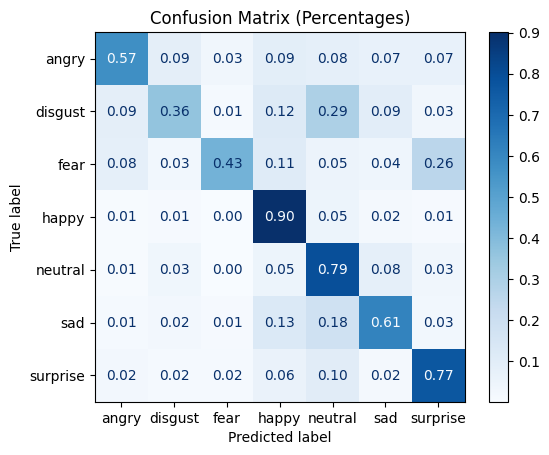

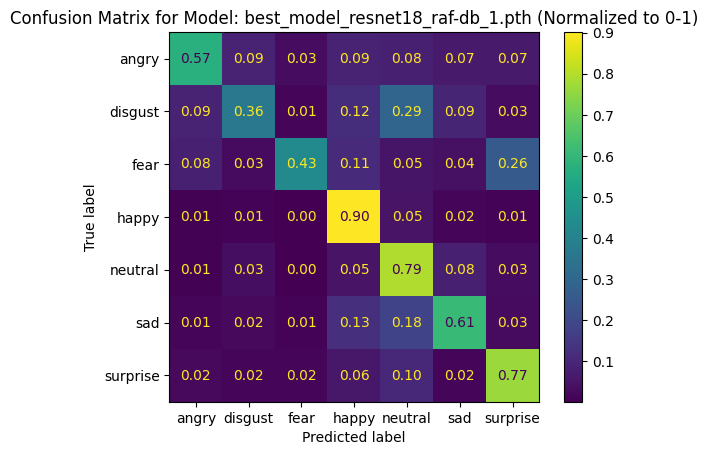

Confusion Matrix (Counts):
 [[ 108   13    2   15    7    9    8]
 [  15   56    1   19   43   24    2]
 [   6    1   30    9    4    9   15]
 [   5   12    1 1079   53   28    7]
 [   5   15    0   39  558   51   12]
 [   3    8    0   37   84  343    3]
 [   5    3    8   14   48    8  243]]
Confusion Matrix (Percentages):
 [[6.66666667e-01 8.02469136e-02 1.23456790e-02 9.25925926e-02
  4.32098765e-02 5.55555556e-02 4.93827160e-02]
 [9.37500000e-02 3.50000000e-01 6.25000000e-03 1.18750000e-01
  2.68750000e-01 1.50000000e-01 1.25000000e-02]
 [8.10810811e-02 1.35135135e-02 4.05405405e-01 1.21621622e-01
  5.40540541e-02 1.21621622e-01 2.02702703e-01]
 [4.21940928e-03 1.01265823e-02 8.43881857e-04 9.10548523e-01
  4.47257384e-02 2.36286920e-02 5.90717300e-03]
 [7.35294118e-03 2.20588235e-02 0.00000000e+00 5.73529412e-02
  8.20588235e-01 7.50000000e-02 1.76470588e-02]
 [6.27615063e-03 1.67364017e-02 0.00000000e+00 7.74058577e-02
  1.75732218e-01 7.17573222e-01 6.27615063e-03]
 [1.51975684

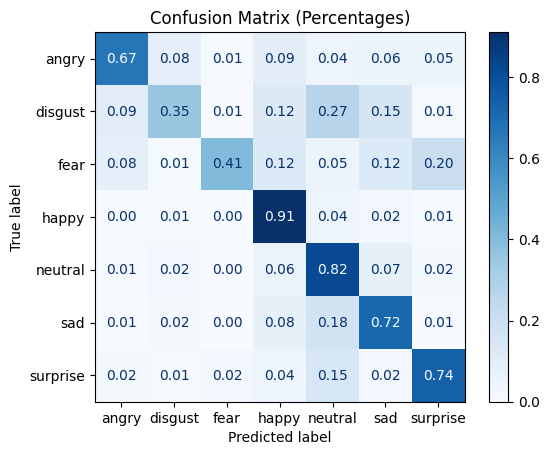

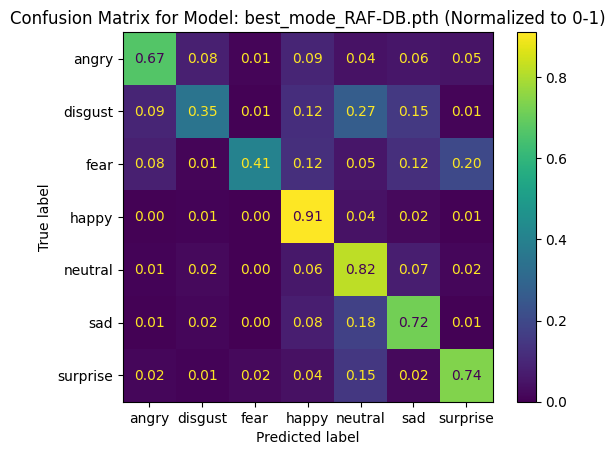

In [19]:
from approach.resnet import ResNet34, ResNet18
from approach.vgg import VGG
from approach.ResEmoteNet import ResEmoteNet

base_dir = "/workspace/RAF-DB"
dataloader, model_labels = load_data(base_dir=base_dir, batch_size=16, transform=transform)

model_architecture_map = {
    model_paths_raf_db[0] : VGG,
    model_paths_raf_db[1] : ResNet34,
    model_paths_raf_db[2] : ResNet18,
    model_paths_raf_db[3] : ResEmoteNet,
    # Add more mappings as needed
}

# Loop through the models, evaluate, and plot confusion matrices
for model_path in model_paths_raf_db:
    if model_path not in model_architecture_map:
        print(f"No architecture found for {model_path}")
        continue
    
    # Initialize the model
    model = model_architecture_map[model_path]()
    
    # Load the state dict
    state_dict = torch.load(model_path)
    model.load_state_dict(state_dict)
    
    # Move model to device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    
    # Evaluate the model
    preds, labels = evaluate_model(model, dataloader, device)
    
    # Plot confusion matrix
    plot_confusion_matrix_normalized(labels, preds, f"Model: {model_path}", model_labels)

Confusion Matrix (Counts):
 [[ 222    0   59   70  307  279   23]
 [  18    0    8   16   27   40    2]
 [  76    0  194   80  274  307   87]
 [  40    0   50 1139  347  195   54]
 [  11    0   33   57  766  336   13]
 [  14    0   50   72  396  591   16]
 [  10    0  127   67   95   49  449]]
Confusion Matrix (Percentages):
 [[0.23125    0.         0.06145833 0.07291667 0.31979167 0.290625
  0.02395833]
 [0.16216216 0.         0.07207207 0.14414414 0.24324324 0.36036036
  0.01801802]
 [0.07465619 0.         0.19056974 0.07858546 0.26915521 0.30157171
  0.08546169]
 [0.02191781 0.         0.02739726 0.62410959 0.19013699 0.10684932
  0.02958904]
 [0.00904605 0.         0.02713816 0.046875   0.62993421 0.27631579
  0.01069079]
 [0.01229148 0.         0.04389816 0.06321335 0.3476734  0.51887621
  0.01404741]
 [0.01254705 0.         0.15934755 0.08406524 0.11919699 0.06148055
  0.56336261]]


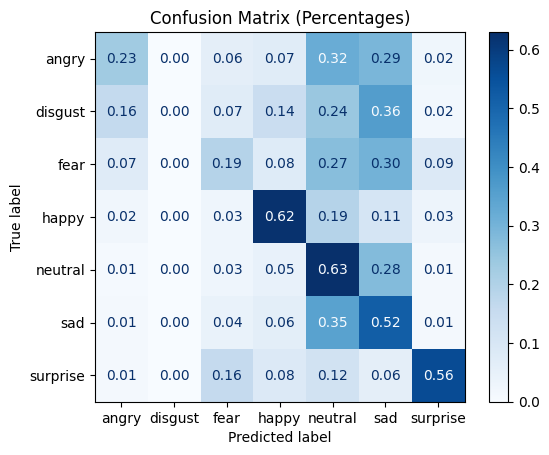

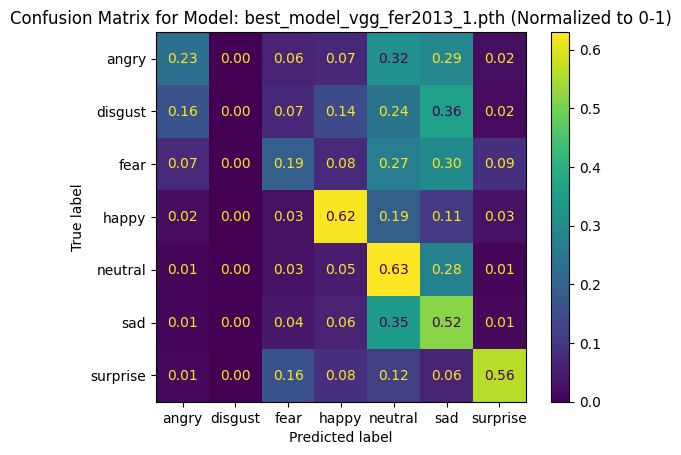

Confusion Matrix (Counts):
 [[ 440   14  122   54  126  185   19]
 [  21   54   11    3    8   13    1]
 [ 122    2  454   58  100  223   59]
 [  61    2   65 1468   90  100   39]
 [  78    2  115  131  634  242   14]
 [  88    4  168   48  186  628   17]
 [  26    2   99   58   29   18  565]]
Confusion Matrix (Percentages):
 [[0.45833333 0.01458333 0.12708333 0.05625    0.13125    0.19270833
  0.01979167]
 [0.18918919 0.48648649 0.0990991  0.02702703 0.07207207 0.11711712
  0.00900901]
 [0.11984283 0.00196464 0.4459725  0.05697446 0.09823183 0.21905697
  0.05795678]
 [0.03342466 0.00109589 0.03561644 0.80438356 0.04931507 0.05479452
  0.02136986]
 [0.06414474 0.00164474 0.09457237 0.10773026 0.52138158 0.19901316
  0.01151316]
 [0.07726076 0.00351185 0.14749781 0.04214223 0.16330114 0.55136084
  0.01492537]
 [0.03262233 0.00250941 0.12421581 0.0727729  0.03638645 0.02258469
  0.70890841]]


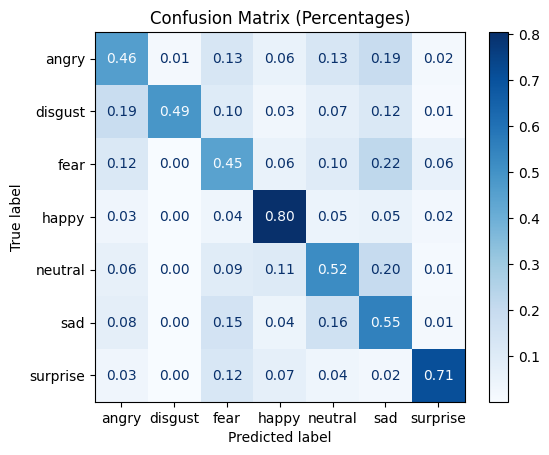

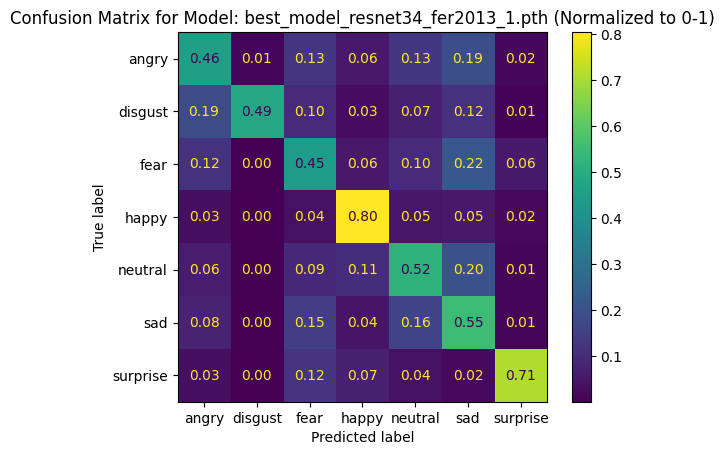

Confusion Matrix (Counts):
 [[ 445    7   98   79  168  140   23]
 [  14   52   12    2   16   12    3]
 [ 117    4  384   87  176  178   72]
 [  54    1   36 1529  113   59   33]
 [  94    4   61  125  758  146   28]
 [ 103    4  119   86  278  532   17]
 [  29    4   57   64   59   13  571]]
Confusion Matrix (Percentages):
 [[4.63541667e-01 7.29166667e-03 1.02083333e-01 8.22916667e-02
  1.75000000e-01 1.45833333e-01 2.39583333e-02]
 [1.26126126e-01 4.68468468e-01 1.08108108e-01 1.80180180e-02
  1.44144144e-01 1.08108108e-01 2.70270270e-02]
 [1.14931238e-01 3.92927308e-03 3.77210216e-01 8.54616896e-02
  1.72888016e-01 1.74852652e-01 7.07269155e-02]
 [2.95890411e-02 5.47945205e-04 1.97260274e-02 8.37808219e-01
  6.19178082e-02 3.23287671e-02 1.80821918e-02]
 [7.73026316e-02 3.28947368e-03 5.01644737e-02 1.02796053e-01
  6.23355263e-01 1.20065789e-01 2.30263158e-02]
 [9.04302019e-02 3.51185250e-03 1.04477612e-01 7.55048288e-02
  2.44073749e-01 4.67076383e-01 1.49253731e-02]
 [3.63864492

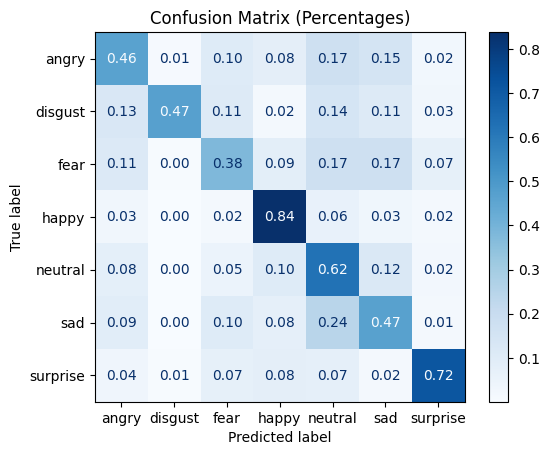

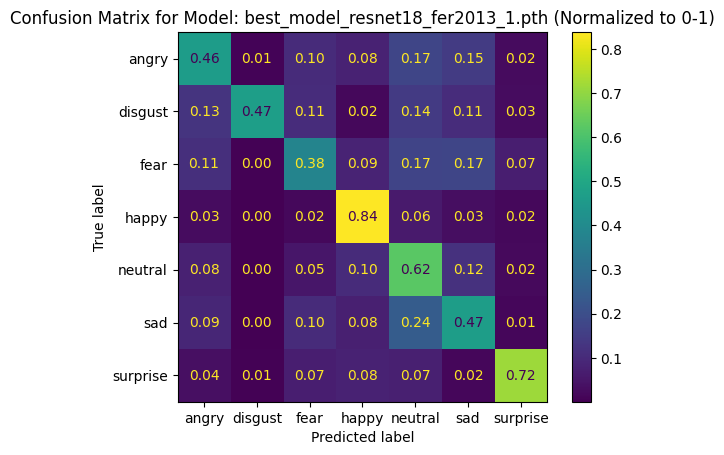

Confusion Matrix (Counts):
 [[ 461    8  117   95  104  144   31]
 [  20   62    8    6    6    4    5]
 [ 112    6  449   72   85  201   93]
 [  35    1   55 1539   81   87   27]
 [  92    4   90  155  585  260   30]
 [ 126    6  147   92  136  605   27]
 [  24    2   70   71   19   26  585]]
Confusion Matrix (Percentages):
 [[4.80208333e-01 8.33333333e-03 1.21875000e-01 9.89583333e-02
  1.08333333e-01 1.50000000e-01 3.22916667e-02]
 [1.80180180e-01 5.58558559e-01 7.20720721e-02 5.40540541e-02
  5.40540541e-02 3.60360360e-02 4.50450450e-02]
 [1.10019646e-01 5.89390963e-03 4.41060904e-01 7.07269155e-02
  8.34970530e-02 1.97445972e-01 9.13555992e-02]
 [1.91780822e-02 5.47945205e-04 3.01369863e-02 8.43287671e-01
  4.43835616e-02 4.76712329e-02 1.47945205e-02]
 [7.56578947e-02 3.28947368e-03 7.40131579e-02 1.27467105e-01
  4.81085526e-01 2.13815789e-01 2.46710526e-02]
 [1.10623354e-01 5.26777875e-03 1.29060579e-01 8.07726076e-02
  1.19402985e-01 5.31167691e-01 2.37050044e-02]
 [3.01129235

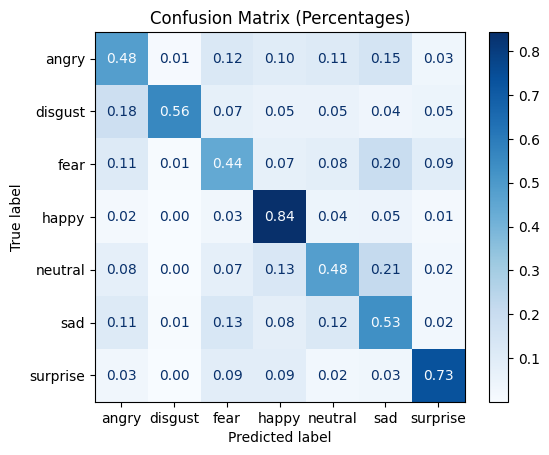

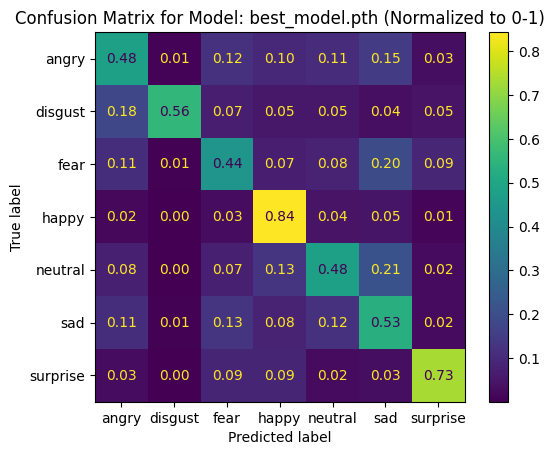

In [21]:
from approach.resnet import ResNet34, ResNet18
from approach.vgg import VGG
from approach.ResEmoteNet import ResEmoteNet

base_dir = "/workspace/fer2013"
dataloader, model_labels = load_data(base_dir=base_dir, batch_size=16, transform=transform)

model_architecture_map = {
    model_paths_fer2013[0] : VGG,
    model_paths_fer2013[1] : ResNet34,
    model_paths_fer2013[2] : ResNet18,
    model_paths_fer2013[3] : ResEmoteNet,
    # Add more mappings as needed
}

# Loop through the models, evaluate, and plot confusion matrices
for model_path in model_paths_fer2013:
    if model_path not in model_architecture_map:
        print(f"No architecture found for {model_path}")
        continue
    
    # Initialize the model
    model = model_architecture_map[model_path]()
    
    # Load the state dict
    state_dict = torch.load(model_path)
    model.load_state_dict(state_dict)
    
    # Move model to device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    
    # Evaluate the model
    preds, labels = evaluate_model(model, dataloader, device)
    
    # Plot confusion matrix
    plot_confusion_matrix_normalized(labels, preds, f"Model: {model_path}", model_labels)

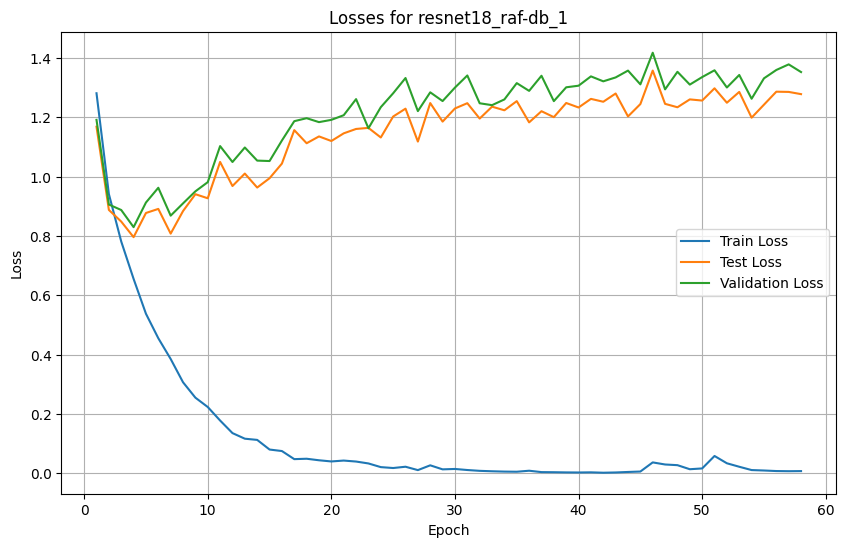

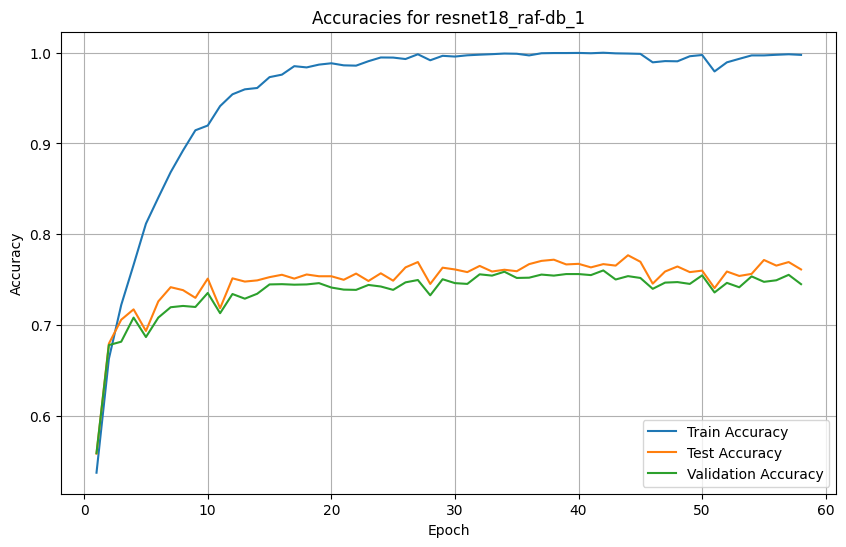

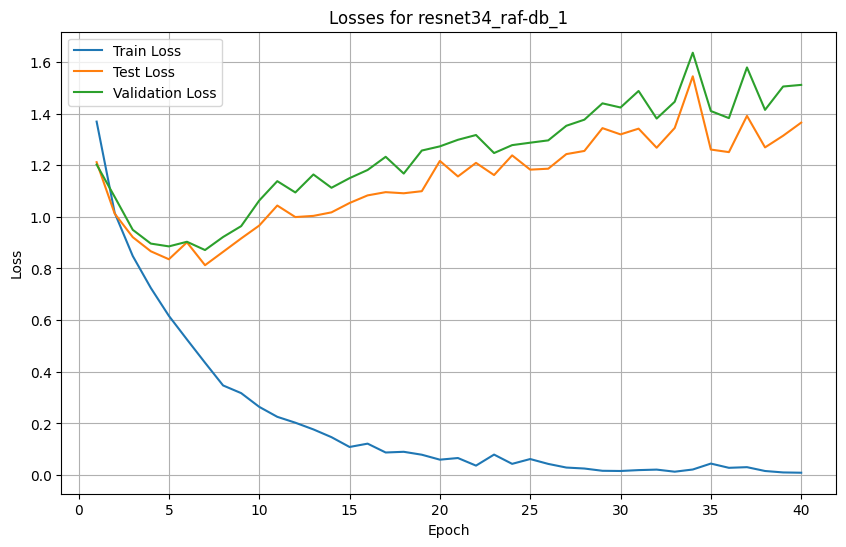

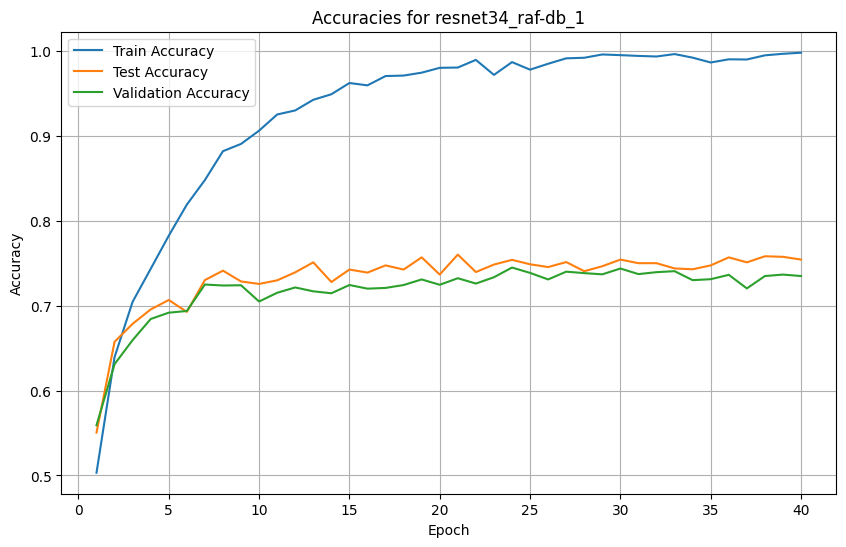

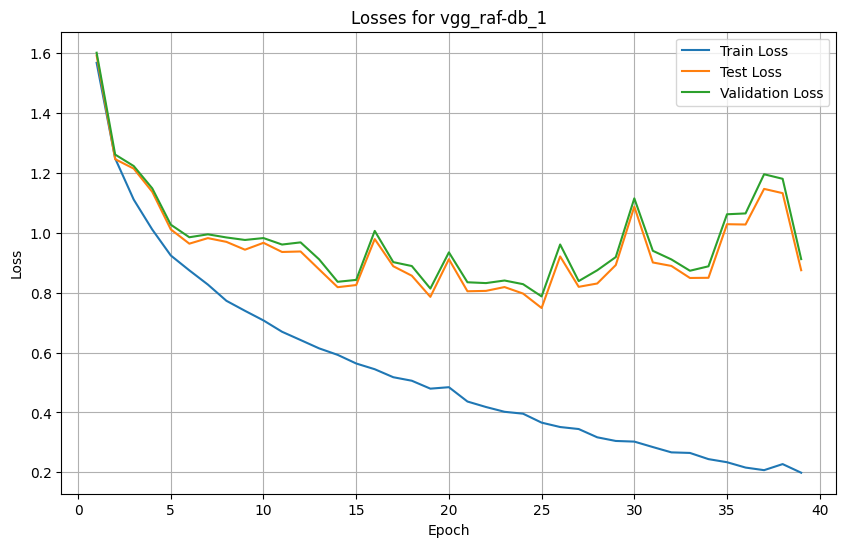

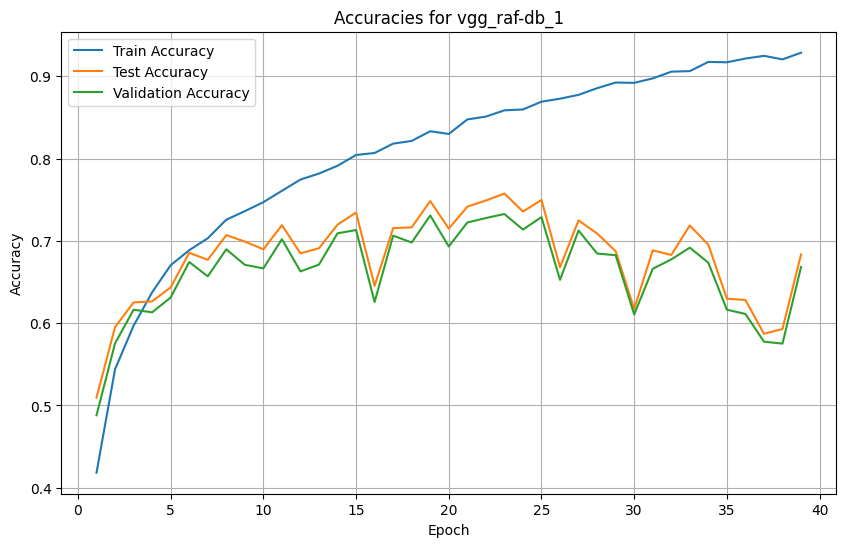

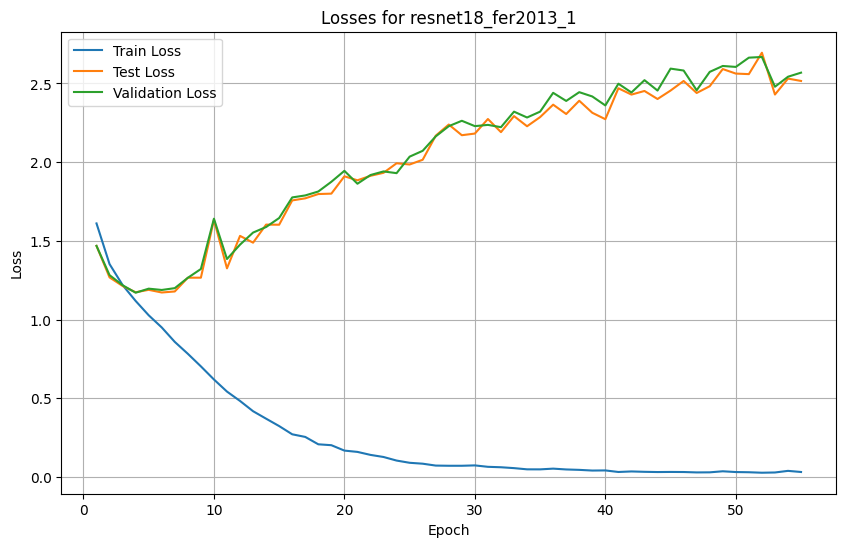

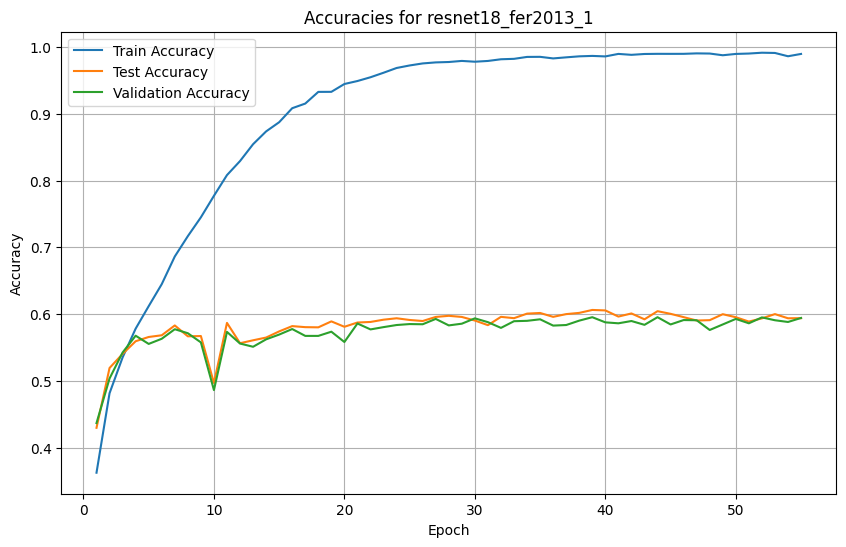

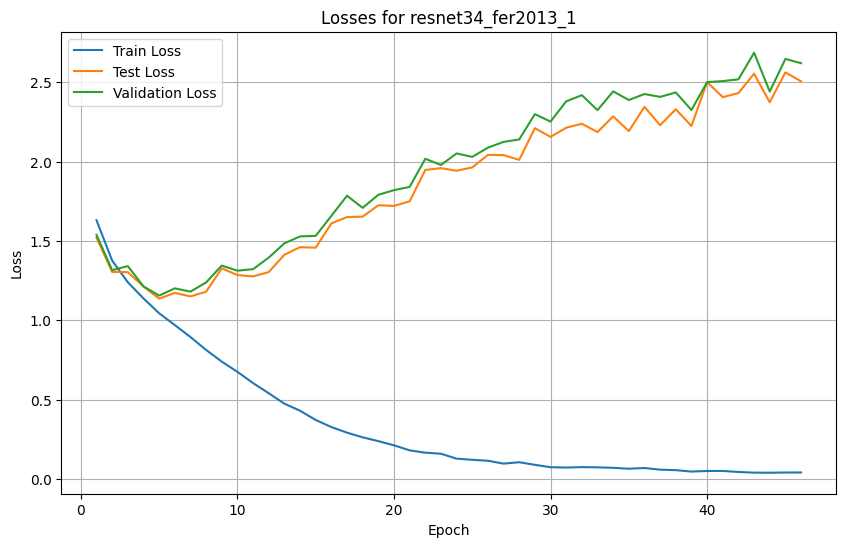

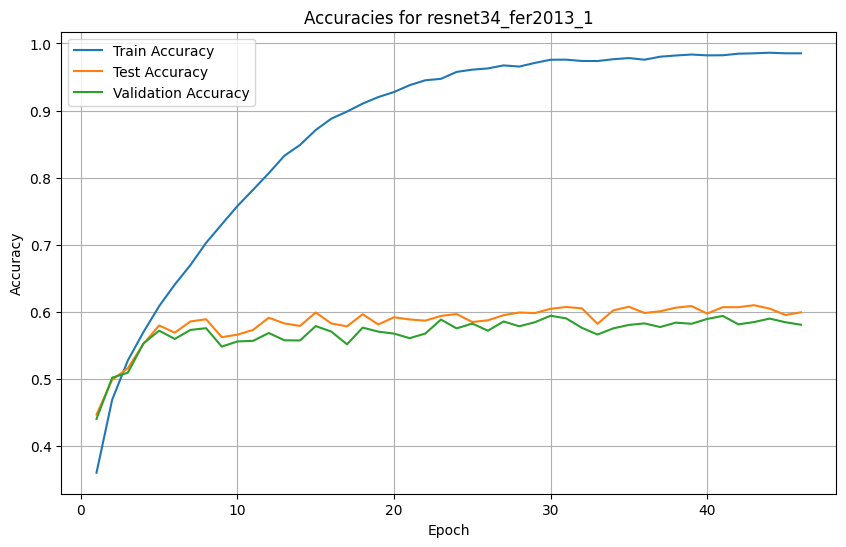

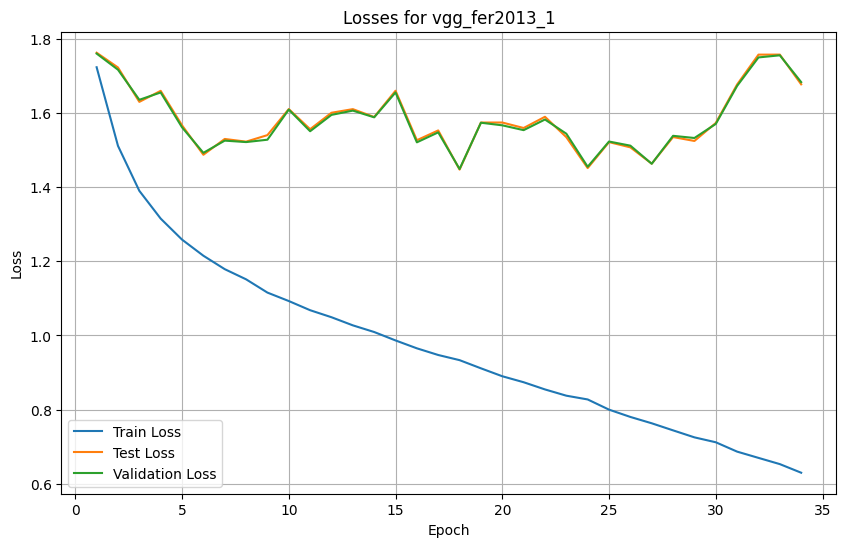

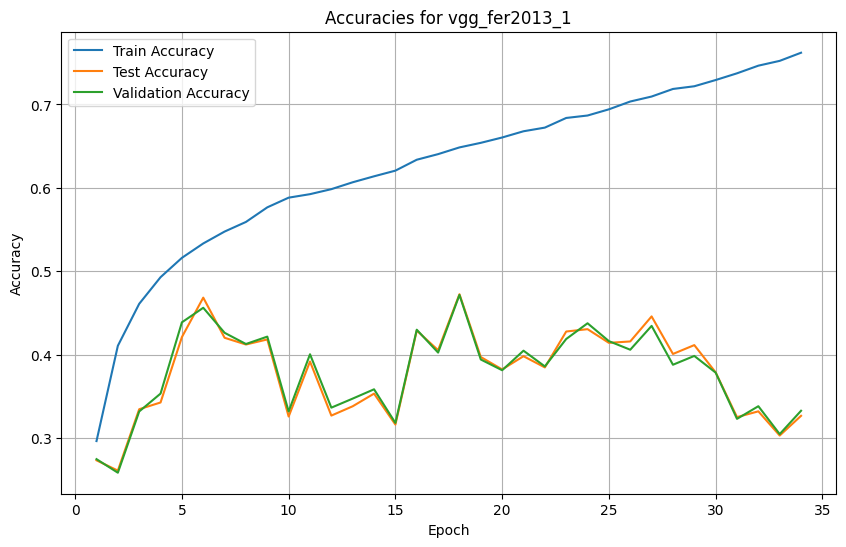

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def load_and_plot_data(model_names):
    for model_name in model_names:
        # Load the data from the CSV file
        csv_filename = f'result_{model_name}.csv'
        try:
            df = pd.read_csv(csv_filename)
        except FileNotFoundError:
            print(f"File {csv_filename} not found.")
            continue

        # Plot losses
        plt.figure(figsize=(10, 6))
        plt.plot(df['Epoch'], df['Train Loss'], label='Train Loss')
        plt.plot(df['Epoch'], df['Test Loss'], label='Test Loss')
        plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss')
        plt.title(f'Losses for {model_name}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Plot accuracies
        plt.figure(figsize=(10, 6))
        plt.plot(df['Epoch'], df['Train Accuracy'], label='Train Accuracy')
        plt.plot(df['Epoch'], df['Test Accuracy'], label='Test Accuracy')
        plt.plot(df['Epoch'], df['Validation Accuracy'], label='Validation Accuracy')
        plt.title(f'Accuracies for {model_name}')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage
models_names = ["resnet18_raf-db_1", "resnet34_raf-db_1", "vgg_raf-db_1", "resnet18_fer2013_1", "resnet34_fer2013_1", "vgg_fer2013_1"]
load_and_plot_data(models_names)
